In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from decimal import Decimal


In [24]:
class FTRL:
    # def init_________________________________________________________________________
    def __init__(self, d, eta, reg):
        self.reg=reg;
        self.d = d; self.t=0; self.eta=eta; 
        self.w = np.ones(d)*(1/d); 

        self.loss_sum_expert = np.zeros(d); self.loss_sum = 0; self.L=np.sqrt(self.d)
        if self.reg==1:
            self.total_purturbed_expert = np.zeros(d) #purturbed leader
        self.B=1; self.regret=[0]; self.mistake=[]; self.R = np.random.random(self.d)*(1/self.eta)
        
    #_________________________________
    
    def projection(self, y):
            m = len(y)
            bget=False
            s = sorted(y)[::-1]
            tmpsum=0

            for i in range(0,m-1):
                tmpsum = tmpsum + s[i]
                tmax = (tmpsum - 1)/(i+1)
                if tmax>=s[i+1]:
                    bget=True
                    break
            if(not bget):
                tmax = (tmpsum+s[m-1]-1)/m
            mask = y-tmax>=0.0
            return (y-tmax)*mask

    
    #____________________________________________________________________________________
        
    def update(self,zt, reg):

        #basic updates------------------------------------------
        self.loss_sum = self.loss_sum + np.sum(zt*self.w)
        self.loss_sum_expert =  self.loss_sum_expert + zt
        step_regret = self.loss_sum -  np.min(self.loss_sum_expert) 
        #_________________________________________________________________

        if self.reg==0:
            self.w = self.w - self.eta*zt
            self.w= self.projection(self.w)
        #_______________________________________________________________________
        if self.reg==1:
            self.total_purturbed_expert = self.total_purturbed_expert  + zt + self.R
            self.w = np.zeros_like(self.w)
            self.w[np.argmin(self.total_purturbed_expert)]=1.0
        #_____________________________________________________________
        if self.reg==2:
            exp_z = np.exp(-self.eta*zt)
            self.w = (self.w * exp_z) /np.sum(self.w*exp_z)
        #_________________________________________________________________________

        self.regret.append(step_regret)
        self.t=self.t+1
        
    def weight(self):
        return self.w

    def return_regret(self):
        return self.regret

    def reset_weight(self):
        self.w = np.ones(self.d)*(1/self.d)
        self.R = np.random.random(self.d)*(1/self.eta)

        
        
        

In [3]:
class func_runner:
    def __init__(self, z, reg=0, eps=0,):
        self.z=z
        self.reg=reg
        self.eps=eps
        self.d = self.z.shape[1]
        


        self.algo=FTRL(self.d,self.eps,self.reg)
    
    def run(self):
        reg=self.reg
        for zt in self.z:
            self.algo.update(zt,reg)
    
    def return_regret(self):
        return self.algo.return_regret()
    


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.82it/s]


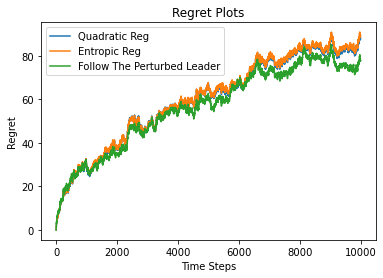

In [35]:
    
#______________________________________
if __name__=='__main__':
    z=np.loadtxt("./Datasets/Dataset2_Z.txt",delimiter=',')
    
    eta1 = 1/(1*np.sqrt(2*z.shape[0]))
    ch=0
    p1 = func_runner(z,ch,eta1)
    p1.run()
    p1_eta = p1.return_regret()
    eta2 = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    p2 = func_runner(z,2,eta2)
    
    
    # eta = np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))
    # p2 = func_runner(z,1,eta,True)
    
    # p1.run()
    p2.run()
    
    p1_r = p1.return_regret()
    p2_r = p2.return_regret()
    
    p3_r_eff = []
    for i in tqdm(range(10)):
        eta3 = np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))
        p3 = func_runner(z,1,eta3)
        p3.run()
        p3_r_eff.append(p3.return_regret())
    
    p3_r = np.mean(p3_r_eff, axis=0)
    plt.title("Regret Plots")

    plt.plot(p1_r, label='Quadratic Reg')
    plt.plot(p2_r, label='Entropic Reg')
    plt.plot(p3_r, label='Follow The Perturbed Leader')
    
    plt.xlabel('Time Steps')
    plt.ylabel('Regret')
    
    plt.legend(loc='best')
    plt.show()


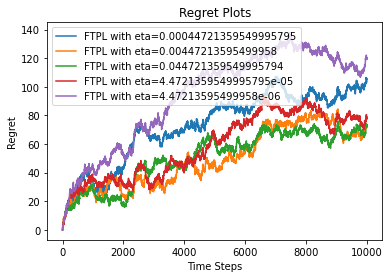

In [22]:
if __name__=='__main__':
    z=np.loadtxt("./Datasets/Dataset2_Z.txt",delimiter=',')
    eta1 =  np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))
    ch=1
    
    
    p1 = func_runner(z,ch,eta1)
    p1.run()
    p1_r=p1.return_regret()
    #___________________
    p2= func_runner(z,ch,eta1*10)
    p2.run()
    p2_r=p2.return_regret()
    #__________
    p3= func_runner(z,ch,eta1*100)
    p3.run()
    p3_r=p3.return_regret()
    #____________
    p4= func_runner(z,ch,eta1/10)
    p4.run()
    p4_r=p4.return_regret()
    #____________
    p5=func_runner(z,ch,eta1/100)
    p5.run()
    p5_r=p5.return_regret()
    #____________
    plt.plot(p1_r,label='FTPL with eta='+str(eta1))
    plt.plot(p2_r,label='FTPL with eta='+str(eta1*10))
    plt.plot(p3_r,label='FTPL with eta='+str(eta1*100))
    plt.plot(p4_r,label='FTPL with eta='+str(eta1/10))
    plt.plot(p5_r,label='FTPL with eta='+str(eta1/100))
    plt.title("Regret Plots")
    plt.xlabel('Time Steps')
    plt.ylabel('Regret')
    
    plt.legend(loc='best')
    plt.show()

In [8]:
 np.sqrt(np.log(z.shape[1]))/(1*np.sqrt(2*z.shape[0]))

0.01858461094424919

In [19]:
np.sqrt(2)/(np.sqrt(z.shape[1]*z.shape[0]))

0.00044721359549995795